<p align="right" width="100%"><img width="200px" height="auto" src="../Admin/eth_logo_kurz_pos.png">

# Mobile Computing

## Exercise: PID Controller Basics

### Prerequisites

This Jupyter Notebook has been tested with Visual Studio Code, running in a local Python environment.


In [1]:
%pip install --quiet matplotlib numpy pandas ipython
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from IPython.display import HTML
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


### 1. PID Controller

A PID controller (Proportional-Integral-Derivative controller) is a control loop mechanism widely used in industrial control systems. The controller continuously calculates an error value $ e(t) $ as the difference between a desired setpoint and a measured process variable, and applies a correction based on three terms: the proportional (P), integral (I), and derivative (D) of the error. The goal of the controller is to adjust the system to minimize the error over time.

The PID control law computes a control output $ u(t) $, which is the sum of three components:

- Proportional (P): This term produces an output proportional to the current error.
  $
  P = K_p \cdot e(t)
  $
  where $ K_p $ is the proportional gain, and $ e(t) $ is the current error.

- Integral (I): This term accounts for the accumulation of past errors to eliminate steady-state error.
  $
  I = K_i \cdot \int_0^t e(\tau) \, d\tau
  $
  where $ K_i $ is the integral gain, and the integral is the accumulation of the error over time.

- Derivative (D): This term predicts future error by calculating the rate of change of the error.
  $
  D = K_d \cdot \frac{d}{dt} e(t)
  $
  where $ K_d $ is the derivative gain, and $ \frac{d}{dt} e(t) $ is the rate of change of the error.

The PID control equation that calculates the output $ out(t) $ is the sum of these three terms:

$
out(t) = K_p \cdot e(t) + K_i \cdot \int_0^t e(\tau) \, d\tau + K_d \cdot \frac{d}{dt} e(t)
$

This term $ out(t) $ is also referred to as the control response.

<br>


#### 1.1 Discrete-Time Approximation
In practical systems, the PID controller is often implemented in a discrete-time form. In a discrete-time sampled system, the integral and derivative terms can be approximated as follows.

Integral:
  $
  I \approx K_i \cdot \sum_{i=0}^{n} e(i) \cdot \Delta t
  $

Here, $ \Delta t $ is the time interval between samples.

Derivative:
  $
  D \approx K_d \cdot \frac{e(n) - e(n-1)}{\Delta t}
  $

Here, $ e(n) $ and $ e(n-1) $ are the current and previous error values, respectively.

<br>

#### 1.1 Example
Assume the following parameters:

- Proportional gain $ K_p = 1.5 $
- Integral gain $ K_i = 1.0 $
- Derivative gain $ K_d = 0.5 $
- Current error $ e(t) = 2.0 $
- Previous error $ e(t-\Delta t) = 1.5 $
- Time step $ \Delta t = 1.0 $ seconds
- Accumulated error $ \int e(t) dt = 4.0 $

The control output $ out(n) $ can be computed as:

1. Proportional term:
   $
   P = 1.5 \cdot 2.0 = 3.0
   $
   
2. Integral term:
   $
   I = 1.0 \cdot 4.0 = 4.0
   $
   
3. Derivative term:
   $
   D = 0.5 \cdot \frac{2.0 - 1.5}{1.0} = 0.25
   $

4. Total output:
   $
   out(n) = 3.0 + 4.0 + 0.25 = 7.25
   $

This is the control response $ out(n) $ based on the given error and PID parameters.

<br>

#### 1.2 Example Plot

error(n) = [ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  2.  1.  0. -1. -2. -2. -2.
 -2. -2. -2. -2. -1.  0.  1.  2.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
P(n) = [ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  2.  1.  0. -1. -2. -2. -2.
 -2. -2. -2. -2. -1.  0.  1.  2.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
I(n) = [ 0.  3.  6.  9. 12. 15. 18. 21. 24. 27. 30. 32. 33. 33. 32. 30. 28. 26.
 24. 22. 20. 18. 17. 17. 18. 20. 23. 26. 29. 32. 35. 38. 41. 44. 47. 50.]
D(n) = [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1. -1. -1. -1.  0.  0.
  0.  0.  0.  0.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
out(n) = [ 3.  6.  9. 12. 15. 18. 21. 24. 27. 30. 33. 33. 33. 32. 30. 27. 26. 24.
 22. 20. 18. 16. 17. 18. 20. 23. 27. 29. 32. 35. 38. 41. 44. 47. 50. 53.]


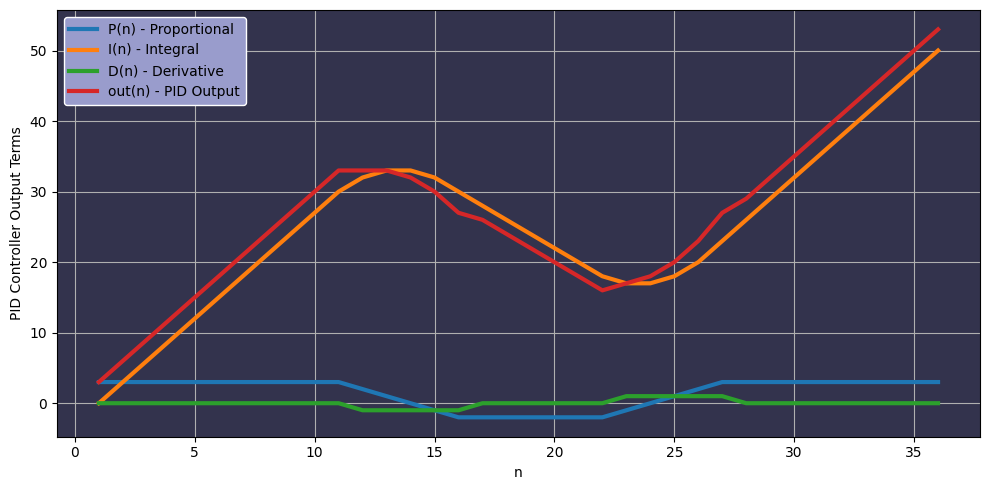

In [2]:
n = np.arange(1, 37)
in_values = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 4, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
result = np.ones(36) * 3
error = result - in_values

# PID constants
Kp = 1
Ki = 1
Kd = 1

# Proportional term
P = Kp * error

# Integral term (cumulative sum of error)
I = np.zeros(36)
for i in range(1, 36):
    I[i] = I[i-1] + error[i]
I = Ki * I

# Derivative term (difference of consecutive errors)
D = np.zeros(36)
for i in range(1, 36):
    D[i] = error[i] - error[i-1]
D = Kd * D

out = P + I + D

print(f"error(n) = {error}")
print(f"P(n) = {P}")
print(f"I(n) = {I}")
print(f"D(n) = {D}")
print(f"out(n) = {out}")

fig, ax = plt.subplots(figsize=(10, 5))
theLineWidth = 3
ax.cla()
ax.axis([None, None, None, None])
props = dict(boxstyle='round', alpha=1, facecolor=(.6, 0.61, 0.8), edgecolor='w')

plt.plot(n, P, label="P(n) - Proportional", linewidth=theLineWidth)
plt.plot(n, I, label="I(n) - Integral", linewidth=theLineWidth)
plt.plot(n, D, label="D(n) - Derivative", linewidth=theLineWidth)
plt.plot(n, out, label="out(n) - PID Output", linewidth=theLineWidth)
plt.legend()
plt.xlabel("n")
plt.ylabel("PID Controller Output Terms")
plt.grid(True)
ax.set_facecolor((.2, 0.2, 0.3))
ax.legend(fancybox=True, framealpha=1,
          loc="upper left", facecolor=(.6, 0.61, 0.8), edgecolor='w')
plt.tight_layout()

### 2. Deterministic or Non-Deterministic Controllers

A PID controller is deterministic because, given the same input (error signal) and configuration (gains), it always produces the same output. A PID controller is often referred to as deterministic because, for a given set of initial conditions (e.g., the current error, previous errors, and system state) and parameters (proportional, integral, and derivative gains), the controller will produce the same output every time. Its behavior is governed by a predefined formula based on the system's error, meaning the outcome is predictable and repeatable, given the same inputs. Thus, the term "deterministic" refers to this predictability and consistency.

The controller's actions at any given time depend solely on the current and past errors, along with the fixed parameters $K_p$, $K_i$, and $K_d$. As a result, for the same error conditions and controller gains, the output will always be the same.

<br>

#### 2.1 Formal Terms

A deterministic system is a system in which the future state is fully determined by the current state and inputs, without any randomness. For a PID controller, given a specific error signal $ e(t) $, the control output $ u(t) $ is calculated deterministically by the PID formula:
  $$
  u(t) = K_p \cdot e(t) + K_i \cdot \int_0^t e(\tau) \, d\tau + K_d \cdot \frac{d}{dt} e(t)
  $$

Since there is no randomness involved, and every calculation is based on deterministic mathematical operations, the PID controller is deterministic.

<br>

#### 2.2 Non-Deterministic Controllers
A non-deterministic controller, on the other hand, may involve some level of randomness or uncertainty in its decision-making process. This could be due to factors such as:

- Stochastic control: The control system is designed to handle random disturbances or uncertainty in the model, and it produces different outputs even for the same inputs.
  
- Adaptive controllers: These controllers adjust their parameters based on the system's behavior or external inputs, which can introduce non-deterministic behavior if, for example, the adaptation process is influenced by random factors.
  
- Controllers with random noise or probabilistic decisions: For instance, a controller that uses a randomized or probabilistic algorithm might apply random perturbations to explore different control strategies.

An example of a non-deterministic controller would be a reinforcement learning (RL)-based controller. In RL, the controller (or agent) learns from interaction with the environment and may incorporate randomness in its actions during the learning process (e.g., using exploration strategies like ε-greedy, where actions are chosen randomly with a probability $ \epsilon $). In this case, the output is not purely based on a fixed rule like in a PID controller, but instead on a probabilistic policy that may vary over time. Even if the same state is encountered multiple times, the RL-based controller may produce different actions due to the randomness in the exploration process. In contrast to deterministic PID control, where the same error leads to the same control action, RL controllers can produce varying actions in identical conditions, especially during the learning phase, making them non-deterministic. 

### 3. Python Implementation

In the PID controller function used below, `errors` is an array of all the errors $e$ we've recorded so far,
`Kp`, `Ki`, `Kd` are the PID constants, and `time_delta` is the amount of time between
error measurements. In Python, the three terms of the PID equation can be computed as follows. The proportional term is `Kp * current_error`, where `current_error` is the last
recorded error: `errors[-1]`. Because we there is a list of discrete error measurements, the integral is replaced by a with summation (In Python: `Ki * sum(errors) * time_delta`):
$$K_I \int e \, dt \approx K_I \sum e \Delta t$$
The derivative of the error is approximated using two consecutive error measurements $e_n$ and $e_{n-1}$, (In Python: `Kd*(current_error - prev_error) / time_delta`):
$$K_D \frac{de}{dt} \approx K_D \frac{e_n - e_{n-1}}{\Delta t}$$

In [3]:
def pid_response(errors, Kp, Ki, Kd, time_delta):
    current_error = errors[-1]
    if len(errors) > 1:
        prev_error = errors[-2]
    else:
        # if there are no two error measurements, just reuse the first error
        prev_error = current_error

    proportional = Kp*current_error
    integral = Ki * sum(errors) * time_delta
    derivative = Kd*(current_error - prev_error) / time_delta

    return proportional + integral + derivative

#### 3.1 Process
The process is the system that acts upon the response given by the PID controller. The function `process` accepts a PID controller response `res` and the current state of the system `state`. The implementation is not relevant,  and used here only for illustration purposes. The error function expresses how far the current state `s` is from our desired state `d`.

In [4]:
p_response = 0
constant_shift = 0

def process(res, state):
    global p_response
    p_response = p_response*0.96 - 0.06*res + constant_shift
    # add "real-world" constraints
    p_response = min(0.3, p_response)
    p_response = max(-0.3, p_response)
    return state + p_response

def calc_error(s, d):
    return s - d

#### 3.2 Simulation

In [5]:
def simulate_pid(Kp, Ki, Kd):
    time_delta = 0.02
    duration = 30
    # create a list of times from 0 to `duration` seconds with steps of `time_delta`
    # in total, duration / time_delta observations will be recorded
    times = np.arange(0, duration, time_delta)

    desired = np.zeros(times.size)
    desired[100:170] = 1

    states = np.zeros(times.size)
    states[0] = 3  # initial state

    errors = np.zeros(times.size)
    errors[0] = calc_error(states[0], desired[0])  # initial error

    for i in range(1, len(times)):
        res = pid_response(errors[:i], Kp, Ki, Kd, time_delta=time_delta)
        state = process(res, states[i - 1])
        states[i] = state
        errors[i] = calc_error(state, desired[i])

    return times, states, desired, errors

#### 3.3 Plot

The simulation might take a few minutes, before the updated plot will appear.

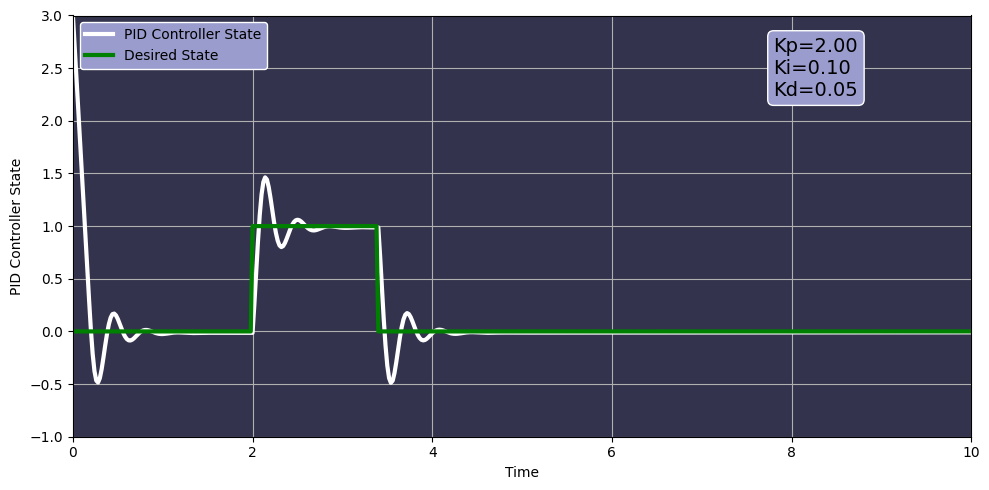

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
theLineWidth = 3
ax.cla()
ax.axis([None, None, None, None])
ax.set_xlabel("Time")
ax.set_ylabel("PID Controller State")

line, = ax.plot([], [], linewidth=theLineWidth, label="PID Controller State", color="w")
ax.set_xlim((0, 10))
ax.set_ylim((-1, 3))
props = dict(boxstyle='round', alpha=1, facecolor=(.6, 0.61, 0.8), edgecolor='w')

tex = ax.text(0.78, 0.95, '', transform=ax.transAxes, verticalalignment='top')

Kp = 2
Kd = 0.05
Ki = .1
t, s, d, e = simulate_pid(Kp, Ki, Kd)
line.set_data(t, s)
fmt_str = 'Kp=%.2f\nKi=%.2f\nKd=%.2f'
s = fmt_str % (Kp,Ki,Kd)
tex.set_text(s)
tex.set_fontsize(14)
tex.set_bbox(props)

ax.plot(t, d, linewidth=theLineWidth, label="Desired State", color="green")

ax.grid(True)
ax.set_facecolor((.2, 0.2, 0.3))
ax.legend(fancybox=True, framealpha=1,
          loc="upper left", facecolor=(.6, 0.61, 0.8), edgecolor='w')
plt.tight_layout()


##### 3.2.2 Animation

This animated gif shows how the output changes with changing parameters. REMARK: Reload this notebook view in case of updates (in case of changed input parameters).


In [7]:
def animate(i):
    Kp = 1.5 - min(i, 100)*0.005
    Kd = 0
    if i > 100:
        Kd = min((i-100)/2.0, 30) * 0.001
    t, s, d, e = simulate_pid(Kp, Ki, Kd)
    line.set_data(t, s)
    fmt_str = 'Kp=%.2f\nKi=%.2f\nKd=%.2f'
    s = fmt_str % (Kp, Ki, Kd)
    tex.set_text(s)
    tex.set_bbox(props)
    return (line,)


anim = animation.FuncAnimation(fig, animate,
                               frames=250, interval=20, blit=True)

HTML(anim.to_html5_video())
anim.save('pid_animation.gif')

print("Reload the page to see the animation file!")

RuntimeError: Requested MovieWriter (ffmpeg) not available


![pid animation gif](pid_animation.gif)




### 3.2 Ki and the Constant Shift

Earlier, `constant_shift` was set to be non-zero (just above the `process` function). This affects the PID controller response graph by introducing a constant error.
The `Ki` weight constant can be used to mitigate the constant shift:
- If `Ki` is set to 0, the PID controller will not be able to correct the constant shift.
- If `Ki` is set to a non-zero value, the PID controller will be able to correct the constant shift.
    
    

### 4. Jemula802 Template

The following template and setup can be used to implement a PID controller within the MAC Layer Management Entity (MLME) of an IEEE 802.11 station.

#### 4.1 Clone and Compile Jemula


In [8]:
!git clone https://bitbucket.org/lfield/jemula802.git
!git clone https://bitbucket.org/lfield/jemula.git

Cloning into 'jemula802'...
Cloning into 'jemula'...


In [9]:
!javac -g:none -classpath "./;jemula802/bin;jemula/bin;jemula/lib/xstream-1.3.1.jar;jemula/lib/jfreechart-1.5.3.jar;jemula/lib/jcommon-1.0.23.jar" -d "jemula/bin" jemula/src/plot/*.java jemula/src/kernel/*.java jemula/src/statistics/*.java
!echo Compilation of jemula done.
!javac -g:none  -classpath "./;jemula802/bin;jemula/bin;jemula/lib/xstream-1.3.1.jar;jemula/lib/jfreechart-1.5.3.jar;jemula/lib/jcommon-1.0.23.jar;jemula/lib/commons-io-2.14.0.jar" -d "jemula802/bin" jemula802/src/emulator/*.java jemula802/src/layer0_medium/*.java jemula802/src/layer1_802Phy/*.java \
 jemula802/src/layer1_80211Phy/*.java jemula802/src/layer2_802Mac/*.java jemula802/src/layer2_80211Mac/*.java \
 jemula802/src/layer2_802Algorithms/*.java jemula802/src/layer3_network/*.java jemula802/src/layer5_application/*.java \
 jemula802/src/layer4_transport/*.java jemula802/src/station/*.java jemula802/src/visualization/*.java \
 jemula802/src/util/*.java jemula802/src/gui/*.java
!echo Compilation of jemula802 done.

import os

ROOT_DIR = os.getcwd()
!echo Root directory is $ROOT_DIR

Compilation of jemula done.
Compilation of jemula802 done.
Root directory is e:\MobComp\WirelessNotebooks\PidController


#### 4.2 Scenario "MobComp_assignment07.xml"
The XML Scenario file [ETH_Course/MobComp_assignment07.xml](jemula802/scenarios/ETH_Course/MobComp_assignment07.xml), defines what will be simulated below. The simulation results are stored in  "[results_MobComp_A07](results_MobComp_A07)". By default, this scenario will show a window that shows how some MAC parameters progress over time.

##### 4.2.1 Simulate

In [10]:
import os
os.chdir(ROOT_DIR)
SCENARIO01="jemula802/scenarios/ETH_Course/MobComp_assignment07.xml"
!echo Running scenario $SCENARIO01
!java -Xms2G -Xmx2G -classpath "jemula802/bin;jemula/bin;jemula/lib/xstream-1.3.1.jar;jemula/lib/jfreechart-1.5.3.jar;jemula/lib/jcommon-1.0.23.jar;jemula/lib/commons-io-2.14.0.jar" emulator.JE802Starter $SCENARIO01

Running scenario jemula802/scenarios/ETH_Course/MobComp_assignment07.xml


 This is Jemula802. Simulating scenario "MobComp_assignment07.xml"...
 JEStatsOutput: Creating new folder "results_MobComp_A07"
0,000 ms MobComp_Assignment07: This is station 1. MobComp algorithm: 'MobComp_Assignment07'.
 JEEventScheduler: *** jemula started (Fri Nov 22 22:55:53 CET 2024) ***
 JEEventScheduler: *** jemula 10% done at (Fri Nov 22 22:56:09 CET 2024) (0h0min) ***
 JEEventScheduler: *** jemula 20% done at (Fri Nov 22 22:56:13 CET 2024) (0h0min) ***
 JEEventScheduler: *** jemula 30% done at (Fri Nov 22 22:56:17 CET 2024) (0h0min) ***
 JEEventScheduler: *** jemula 40% done at (Fri Nov 22 22:56:20 CET 2024) (0h0min) ***
 JEEventScheduler: *** jemula 50% done at (Fri Nov 22 22:56:24 CET 2024) (0h0min) ***
 JEEventScheduler: *** jemula 60% done at (Fri Nov 22 22:56:29 CET 2024) (0h0min) ***
 JEEventScheduler: *** jemula 70% done at (Fri Nov 22 22:56:41 CET 2024) (0h0min) ***
 JEEventScheduler: *** jemula 80% done at (Fri Nov 22 22:56:46 CET 2024) (0h0min) ***
 JEEventScheduler:

##### 4.2.2 Plot the Results


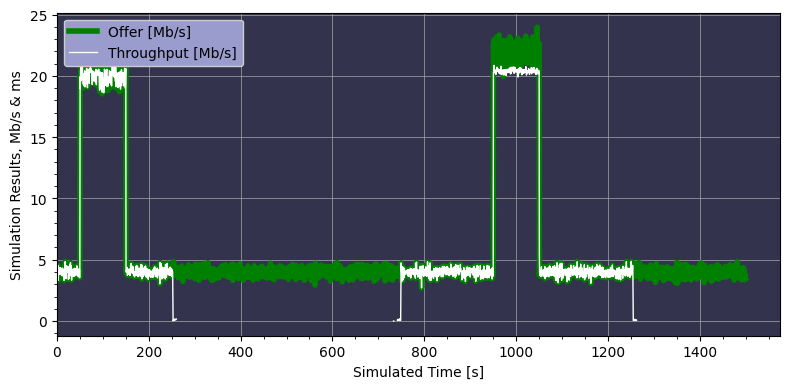

In [11]:
def plot_thrp_offer(result_total_offer, result_total_thrp):
    fig, ax = plt.subplots(figsize=(8, 4))
    theLineWidth = 2
    ax.cla()
    ax.grid(color="#AAAAAA", linewidth=.5, linestyle='-', alpha=1)
    ax.axis([None, None, None, None])
    ax.set_facecolor((.2, 0.2, 0.3))
    plt.xlim(0, np.max(result_total_offer.iloc[:, 0]) / 1000 * 1.05)  # Set x-axis limits
    #plt.ylim(0, ylim)  # Set y-axis limits
    plt.xlabel('Simulated Time [s]')
    plt.ylabel('Simulation Results, Mb/s & ms')
    plt.grid(True)  # Turn on the grid
    plt.minorticks_on()  # Enable minor ticks

    plt.plot(result_total_offer.iloc[:, 0] / 1000, result_total_offer.iloc[:, 6], '-', color='g', linewidth=4, label='Offer [Mb/s]')
    plt.plot(result_total_thrp.iloc[:, 0] / 1000, result_total_thrp.iloc[:, 6], '-', color='w', linewidth=1, label='Throughput [Mb/s]')
    plt.legend(loc="upper left", fancybox=True, framealpha=1, facecolor=(.6, 0.61, 0.8))
    plt.tight_layout()


import os
if os.path.isdir("results_MobComp_A07"):
    os.chdir("results_MobComp_A07")

result_total_offer = pd.read_csv('total_offer.csv', skiprows=2)
result_total_thrp = pd.read_csv('total_thrp.csv', skiprows=2)

plot_thrp_offer(result_total_offer, result_total_thrp)

os.chdir(ROOT_DIR)

### APPENDIX: Source and License

This notebook makes use of https://github.com/Team334/notebooks/blob/master/PID.ipynb

MIT License

Copyright (c) 2017 Team 334 - TechKnights

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

<p align="center" width="100%">═════════════════════════════════<br>
 Stefan Mangold (<a href="mailto:stefan.mangold@inf.ethz.ch">stefan.mangold@inf.ethz.ch</a>)<br><img width="200px" height="auto" src="../Admin/eth_logo_kurz_pos.png"></p>